In [ ]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from collections import defaultdict

plt.rcParams["figure.dpi"] = 140

In [ ]:
#откроем данные
from google.colab import files
uploaded = files.upload()

Saving community_dataset.csv to community_dataset.csv


In [ ]:
import pandas as pd

df = pd.read_csv('community_dataset.csv')
df

In [ ]:
df.columns

Index(['distance_to_vasculature', 'distance_to_largest_cell',
       'immune_marker_1', 'immune_marker_2', 'cell_interaction', 'cell_type',
       'case_id', 'area_of_cell', 'age_group'],
      dtype='object')

In [ ]:
df['index'] = range(1, len(df) + 1)
df

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group,index
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group,1
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group,2
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group,3
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group,4
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group,5
...,...,...,...,...,...,...,...,...,...,...
269437,928.977004,720.993469,9.667603,29.866927,community_6,Stroma cells,983,258,young_group,269438
269438,651.888363,1040.658354,20.298864,40.847738,community_2,Immune type 1,983,160,young_group,269439
269439,754.601247,688.651619,10.351852,22.967870,community_3,Unclassified,983,190,young_group,269440
269440,901.768538,700.092692,11.459289,57.536165,community_4,Stroma cells,983,535,young_group,269441


In [ ]:
community_cell_count = pd.pivot_table(
    df, index="cell_interaction", columns="cell_type", values="index", aggfunc=len
).fillna(0)

In [ ]:
community_cell_count

cell_type,Blood cells,Bone cells,Immune type 1,Immune type 2,Largest cells,Stroma cells,Unclassified,Vasculature
cell_interaction,,,,,,,,
community_1,810,1128,581,4985,371,36619,4004,18
community_2,499,168,1396,1709,78,29179,18433,20
community_3,101,60,841,1192,52,5660,18759,22
community_4,923,485,525,1791,330,72339,4565,11
community_5,332,561,1519,4537,420,11840,15614,58
community_6,153,153,713,1990,737,17555,5591,15


In [ ]:
cell_types = [
    "Blood cells",
    "Immune type 1",
    "Immune type 2",
    "Stroma cells",
    "Unclassified",
]

In [ ]:
cell_types

['Blood cells',
 'Immune type 1',
 'Immune type 2',
 'Stroma cells',
 'Unclassified']

In [ ]:
pd.melt(
    result_df,
    value_vars=cell_types,
    var_name="cell_type",
    value_name="cell_number",
    id_vars="age_group",
)

,age_group,cell_type,cell_number
0,elder_group,Blood cells,228
1,elder_group,Blood cells,133
2,elder_group,Blood cells,66
3,elder_group,Blood cells,94
4,young_group,Blood cells,498
5,young_group,Blood cells,1198
6,young_group,Blood cells,129
7,young_group,Blood cells,472
8,elder_group,Immune type 1,1140
9,elder_group,Immune type 1,150


**1)** Есть ли стат-значимость между типом клетки и:

**а)** Размером клетки (area_of_cell), добавьте hue по возрастным группам.

**б)** Экспрессией иммунных маркеров (immune_marker_1, immune_marker_2), добавьте hue по возрастным группам.

**в)** Дистанцией до ближайших объектов (distance_to_vasculature, distance_to_largest_cell), добавьте hue по возрастным группам.
В качестве ответов можно приводить box_plot/swarplot, где по одной оси будет тип клеток, а по другой — оцениваемая вами статистика.

**1а)**

Манн-Уитни с поправкой Бонферрони

In [ ]:
from scipy.stats import mannwhitneyu

# Выбираем данные для клеток типа "A" и "B"
data_A = df[df['cell_type'] == 'Blood cells']['area_of_cell']
data_B = df[df['cell_type'] == 'Stroma cells']['area_of_cell']

# Проводим тест Манна-Уитни с поправкой Бонферрони
statistic, p_value = mannwhitneyu(data_A, data_B, alternative='less')

print('Mann-Whitney U Statistic:', statistic)
print('p-value:', p_value)

Mann-Whitney U Statistic: 333469053.5
p-value: 1.0


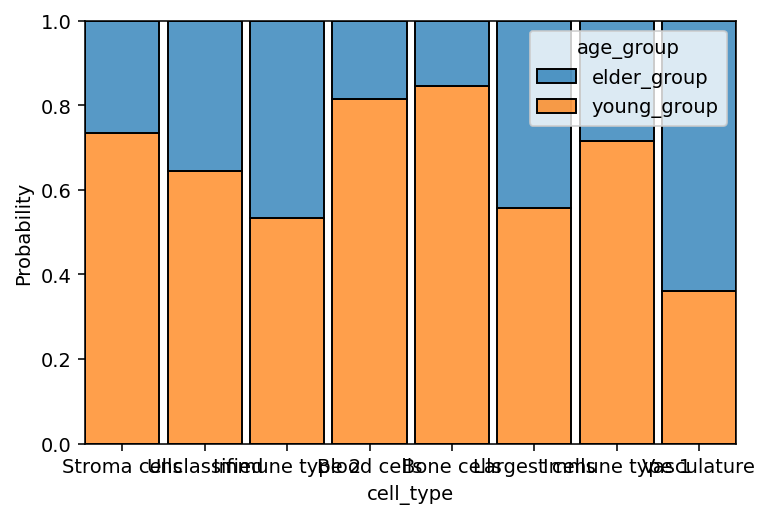

In [ ]:
sns.histplot(
    data=df,
    x="cell_type", hue="age_group",
    multiple="fill", stat="probability",
    discrete=True, shrink=.9
)

**1б)** Есть ли стат-значимость между типом клетки и экспрессией иммунных маркеров (immune_marker_1, immune_marker_2), добавьте hue по возрастным группам.

In [ ]:
d_f

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group,index
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group,1
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group,2
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group,3
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group,4
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group,5
...,...,...,...,...,...,...,...,...,...,...
269437,928.977004,720.993469,9.667603,29.866927,community_6,Stroma cells,983,258,young_group,269438
269438,651.888363,1040.658354,20.298864,40.847738,community_2,Immune type 1,983,160,young_group,269439
269439,754.601247,688.651619,10.351852,22.967870,community_3,Unclassified,983,190,young_group,269440
269440,901.768538,700.092692,11.459289,57.536165,community_4,Stroma cells,983,535,young_group,269441


In [ ]:
from scipy.stats import mannwhitneyu

# Выбираем данные для клеток типа "A" и "B"
data_A = df[df['cell_type'] == 'Blood cells']['immune_marker_1']
data_B = df[df['cell_type'] == 'Stroma cells']['immune_marker_2']

# Проводим тест Манна-Уитни с поправкой Бонферрони
statistic, p_value = mannwhitneyu(data_A, data_B, alternative='greater')

print('Mann-Whitney U Statistic:', statistic)
print('p-value:', p_value)

Mann-Whitney U Statistic: 42029149.0
p-value: 1.0


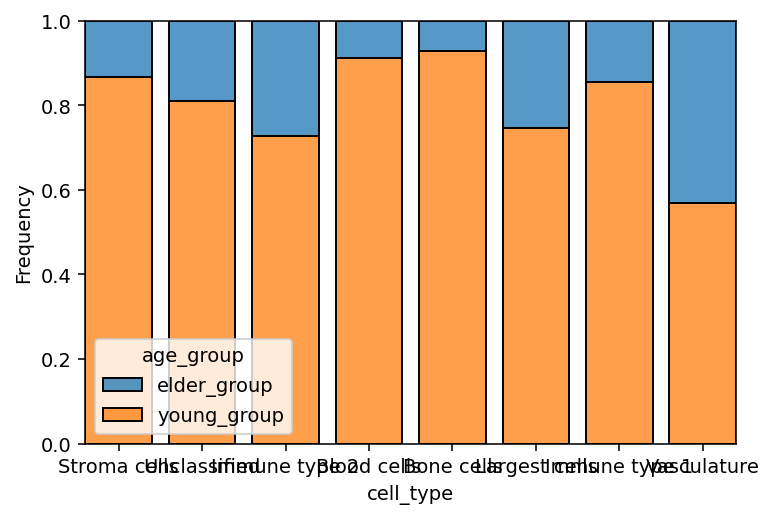

In [ ]:
sns.histplot(
    data=d_f,
    x="cell_type", hue="age_group",
    multiple="fill", stat="frequency",
    discrete=True, shrink=.8
)

**1в)** Есть ли стат-значимость между типом клетки и дистанцией до ближайших объектов (distance_to_vasculature, distance_to_largest_cell), добавьте hue по возрастным группам. В качестве ответов можно приводить box_plot/swarplot, где по одной оси будет тип клеток, а по другой — оцениваемая вами статистика.

In [ ]:
df = d_f

In [ ]:
from scipy.stats import mannwhitneyu

# Выбираем данные для клеток типа "A" и "B"
data_A = df[df['cell_type'] == 'Blood cells']['distance_to_vasculature']
data_B = df[df['cell_type'] == 'Stroma cells']['distance_to_largest_cell']

# Проводим тест Манна-Уитни с поправкой Бонферрони
statistic, p_value = mannwhitneyu(data_A, data_B, alternative='less')

print('Mann-Whitney U Statistic:', statistic)
print('p-value:', p_value)

Mann-Whitney U Statistic: 379414212.0
p-value: 1.0


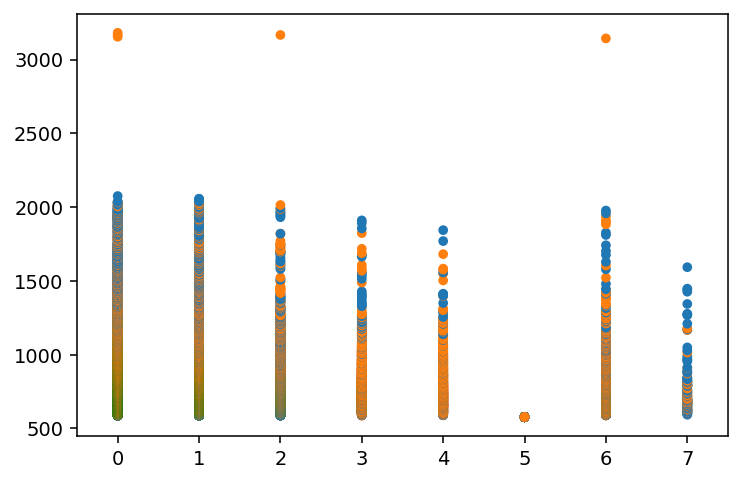

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df
grouped_df = df.groupby(['cell_type', "distance_to_largest_cell", "distance_to_vasculature"])

x = "cell_type"
y1 = "distance_to_largest_cell"
y2 = "distance_to_vasculature"
hue = "age_group"

sns.swarmplot(x=x, y=y1, hue=hue, data=df)
sns.swarmplot(x=x, y=y2, hue=hue, data=df)

plt.title("Box plot for distance to nearest objects by type of cell and age group")

plt.show()

**2)** В каком клеточном микроокружении клеток какого типа статистически больше, чем в других микроокружениях? (колонка cell_interaction). Для ответа используйте box_plot/swarplot с hue по микроокружениям, где:

по Ох будут типы клеток,

по Оу — их количество.

Не забудьте посчитать количество для каждого пациента отдельно, иначе выборка не будет репрезентативной.

In [ ]:
df = d_f

In [ ]:
result_df = (
    pd.pivot_table(
        df,
        index=["age_group", "case_id", 'cell_interaction'],
        columns=["cell_type"],
        values="index",
        aggfunc=len,
    )
    .fillna(0)
    .reset_index()
)

In [ ]:
result_df

cell_type,age_group,case_id,cell_interaction,Blood cells,Bone cells,Immune type 1,Immune type 2,Largest cells,Stroma cells,Unclassified,Vasculature
0,elder_group,40,community_1,37.0,27.0,27.0,1343.0,67.0,5522.0,396.0,2.0
1,elder_group,40,community_2,40.0,10.0,130.0,420.0,22.0,4994.0,2116.0,2.0
2,elder_group,40,community_3,20.0,12.0,293.0,530.0,22.0,1816.0,5549.0,10.0
3,elder_group,40,community_4,18.0,3.0,6.0,158.0,18.0,3333.0,131.0,2.0
4,elder_group,40,community_5,77.0,91.0,469.0,2440.0,220.0,5046.0,5300.0,21.0
5,elder_group,40,community_6,36.0,31.0,215.0,1026.0,231.0,6216.0,1563.0,4.0
6,elder_group,559,community_1,42.0,29.0,11.0,56.0,11.0,1401.0,117.0,3.0
7,elder_group,559,community_2,17.0,3.0,24.0,35.0,3.0,917.0,388.0,2.0
8,elder_group,559,community_3,3.0,2.0,22.0,23.0,5.0,367.0,908.0,2.0
9,elder_group,559,community_4,18.0,0.0,1.0,10.0,1.0,884.0,31.0,2.0


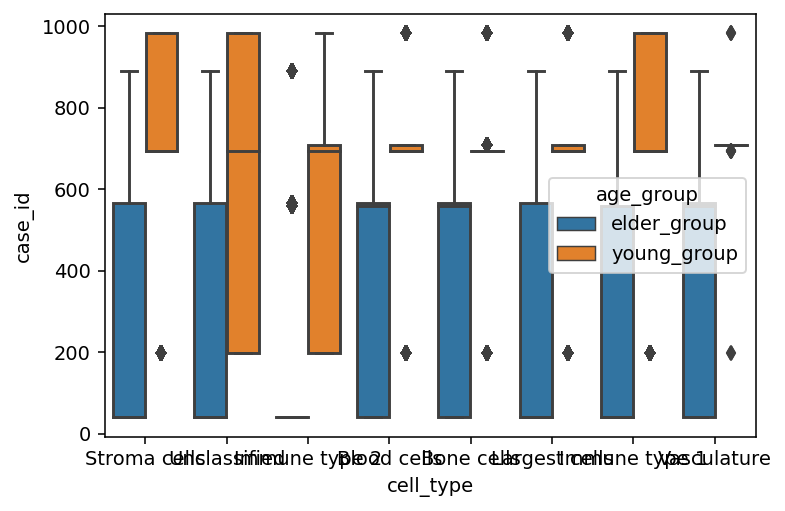

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

x = 'cell_type'
y = 'case_id'
hue = "age_group"

sns.boxplot(x=x, y=y, hue=hue, data=df)

plt.show()

**3)** Есть ли разница в доле микроокружения в тканях пациентов разных возрастов? Для ответа используйте box_plot/swarplot с hue по возрастным группам, где:

по Ох будут микроокружения,

по Оу — их доля в ткани пациента.

Не забудьте посчитать доли для каждого пациента отдельно, иначе выборка не будет репрезентативной.

In [ ]:
result_df

cell_type,age_group,case_id,cell_interaction,Blood cells,Bone cells,Immune type 1,Immune type 2,Largest cells,Stroma cells,Unclassified,Vasculature
0,elder_group,40,community_1,37.0,27.0,27.0,1343.0,67.0,5522.0,396.0,2.0
1,elder_group,40,community_2,40.0,10.0,130.0,420.0,22.0,4994.0,2116.0,2.0
2,elder_group,40,community_3,20.0,12.0,293.0,530.0,22.0,1816.0,5549.0,10.0
3,elder_group,40,community_4,18.0,3.0,6.0,158.0,18.0,3333.0,131.0,2.0
4,elder_group,40,community_5,77.0,91.0,469.0,2440.0,220.0,5046.0,5300.0,21.0


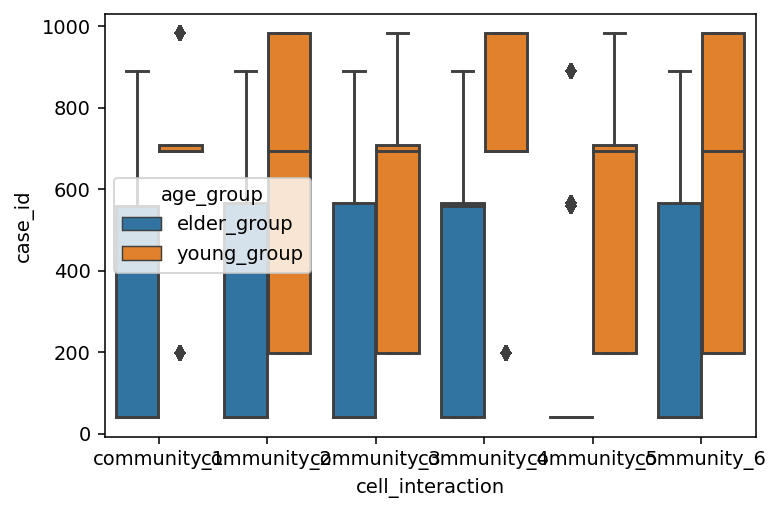

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

x = 'cell_interaction'
y = 'case_id'
hue = "age_group"

sns.boxplot(x=x, y=y, hue=hue, data=df)

plt.show()

**4)** Правда ли, что иммунные клетки (Immune type 1 и Immune type 2) лежат ближе к сосудам и крупным клеткам (Обе колонки distance), чем стромальные клетки (Stroma cells) у молодых, но не у пожилых пациентов? Эту гипотезу нужно проверить бутстрапом (как разницу средних для двух выборок.

In [ ]:
df = d_f
df

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group,index
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group,1
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group,2
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group,3
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group,4
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group,5
...,...,...,...,...,...,...,...,...,...,...
269437,928.977004,720.993469,9.667603,29.866927,community_6,Stroma cells,983,258,young_group,269438
269438,651.888363,1040.658354,20.298864,40.847738,community_2,Immune type 1,983,160,young_group,269439
269439,754.601247,688.651619,10.351852,22.967870,community_3,Unclassified,983,190,young_group,269440
269440,901.768538,700.092692,11.459289,57.536165,community_4,Stroma cells,983,535,young_group,269441


In [ ]:
immune_cells = df[df['cell_type'].isin(["Immune type 1", "Immune type 2"])]
stroma_cells = df[df['cell_type'] == "Stroma cells"]

immune_cells_by_age = immune_cells.groupby('age_group').mean()[['distance_to_vasculature', 'distance_to_largest_cell']]
stroma_cells_by_age = stroma_cells.groupby('age_group').mean()[['distance_to_vasculature', 'distance_to_largest_cell']]

print("У молодых пациентов иммунные клетки находятся ближе к сосудам, чем стромальные клетки:",
      immune_cells_by_age.loc['young_group', 'distance_to_vasculature'] < stroma_cells_by_age.loc['young_group', 'distance_to_vasculature'])
print("У молодых пациентов иммунные клетки находятся ближе к крупным клеткам, чем стромальные клетки:",
      immune_cells_by_age.loc['young_group', 'distance_to_largest_cell'] < stroma_cells_by_age.loc['young_group', 'distance_to_largest_cell'])
print("У пожилых пациентов иммунные клетки находятся ближе к сосудам, чем стромальные клетки:",
      immune_cells_by_age.loc['elder_group', 'distance_to_vasculature'] < stroma_cells_by_age.loc['elder_group', 'distance_to_vasculature'])
print("У пожилых пациентов иммунные клетки находятся ближе к крупным клеткам, чем стромальные клетки:",
      immune_cells_by_age.loc['elder_group', 'distance_to_largest_cell'] < stroma_cells_by_age.loc['elder_group', 'distance_to_largest_cell'])

У молодых пациентов иммунные клетки находятся ближе к сосудам, чем стромальные клетки: True
У молодых пациентов иммунные клетки находятся ближе к крупным клеткам, чем стромальные клетки: True
У пожилых пациентов иммунные клетки находятся ближе к сосудам, чем стромальные клетки: True
У пожилых пациентов иммунные клетки находятся ближе к крупным клеткам, чем стромальные клетки: True


In [ ]:
immune_cells = df[df['cell_type'].isin(["Immune type 1", "Immune type 2"])]
stroma_cells = df[df['cell_type'] == "Stroma cells"]

immune_distance = immune_cells['distance_to_vasculature']
stroma_distance = stroma_cells['distance_to_vasculature']

observed_diff = np.mean(immune_distance) - np.mean(stroma_distance)

num_resamples = 1000
differences = np.empty(num_resamples)
for i in range(num_resamples):
    immune_resample = np.random.choice(immune_distance, size=len(immune_distance), replace=True)
    stroma_resample = np.random.choice(stroma_distance, size=len(stroma_distance), replace=True)
    differences[i] = np.mean(immune_resample) - np.mean(stroma_resample)

p_value = np.sum(differences >= observed_diff) / num_resamples

print("P-value:", p_value)

P-value: 0.515


**5)** Правда ли, что иммунные клетки в среднем лежат ближе к сосудам у молодых, но не у пожилых пациентов? Эту гипотезу необходимо проверить пермутационным тестом. В качестве исходной статистики берем массив с расстояниями только для данного типа клеток (длина - n), запоминаем среднее для каждого пациента. На каждой итерации набираем выборку размером n из всей! колонки с расстояниями до сосудов и смотрим соотношение с исходной статистикой. Проверяем гипотезы. Комбинировать p-values для каждой возрастной группы можно с помощью этого инструмента.

In [ ]:
df = d_f
df.head(5)

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group,index
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group,1
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group,2
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group,3
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group,4
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group,5


In [ ]:
immune_cells = df[df['cell_type'].isin(["Immune type 1", "Immune type 2"])]

immune_cells_by_age = df.groupby('age_group')['distance_to_vasculature']

young_distance = immune_cells_by_age.get_group("young_group")
elder_distance = immune_cells_by_age.get_group("elder_group")
observed_diff = np.mean(young_distance) - np.mean(elder_distance)

num_permutations = 1000
differences = np.empty(num_permutations)
for i in range(num_permutations):
    shuffled_labels = np.random.permutation(np.concatenate((np.zeros(len(young_distance)), np.ones(len(elder_distance)))))
    differences[i] = np.mean(np.concatenate((young_distance, elder_distance))[shuffled_labels == 0]) - np.mean(np.concatenate((young_distance, elder_distance))[shuffled_labels == 1])

p_value = np.sum(differences >= observed_diff) / num_permutations

print("P-value:", p_value)

P-value: 0.0


Пермутационный тест определяет вероятность того, что наблюдаемая разница в расстоянии до сосудов между молодыми и пожилыми пациентами могла возникнуть только случайно, учитывая данные выборки иммунных клеток.
В данной задаче p-value = 0.0 - это значит, что не было найдено ни одного случая, когда разность средних значений дистанции до сосудов между молодыми и пожилыми пациентами была равна или больше наблюдаемой разности. Это говорит о том, что наблюдаемая разность является статистически значимой и не может быть объяснена случайными колебаниями.